**Big Questions**
1) How does running back production affect wins and losses?
2) How has running back pay changed over the last 10 years?
3) How does running back production compare with that of other offensive skill players (tight ends, wide receivers)?


In [1]:
# import required modules
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import os
import glob
import altair as alt
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Change to directory that has statistics for rushing and receiving for each team over the last ten seasons
os.chdir('./Team Excel Files')

In [3]:
# When the excel files downloaded, some of the columns have the same names 
# The code below changes the column names to allow the files to be read into dataframes properly
for FileList in glob.glob('*.xlsx'):
    workbook = load_workbook(filename=FileList)
    #open workbook
    sheet = workbook.active
    #modify the desired cell
    sheet["L2"] = "Y/G_rush"
    sheet["U2"] = "Y/G_receiving"
    sheet["I2"] = "TD_rush"
    sheet["R2"] = "TD_receiving"
    sheet["J2"] = "Lng_rush"
    sheet["S2"] = "Lng_receiving"
    sheet["H2"] = "Yds_rush"
    sheet["P2"] = "Yds_receiving"
    #save the file
    workbook.save(filename=FileList)

In [4]:
#Create a dictionary and then a dataframe that contains the salary cap for each of the last ten seasons
salary = {'Year':['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'],
          'salary_cap':[123600000,133000000,143280000,155270000,167000000,177200000,188200000,198200000,182500000,208200000]
         }
salary_data = pd.DataFrame.from_dict(salary)

In [5]:
#Display the salary cap dataframe
salary_data

Year  salary_cap
0  2013   123600000
1  2014   133000000
2  2015   143280000
3  2016   155270000
4  2017   167000000
5  2018   177200000
6  2019   188200000
7  2020   198200000
8  2021   182500000
9  2022   208200000

In [6]:
#Check the types of the salary cap dataframe columns
salary_data.dtypes

Year          object
salary_cap     int64
dtype: object

In [7]:
#Change the year column to be integers
salary_data = salary_data.astype({'Year':int})

In [8]:
#Create the master dataframe with the column names from each spreadsheet
master_df = pd.DataFrame(columns = ('No.','Player','Age','Pos',
                             'G','GS','Att','Yds_rush','TD_rush',
                             'Lng_rush','Y/A','Y/G_rush','A/G','Tgt',
                             'Rec','Yds_receiving','Y/R','TD_receiving','Lng_receiving',
                             'R/G','Y/G_receiving','Ctch%','Y/Tgt',
                             'Touch','Y/Tch','YScm','RRTD',
                             'Fmb','team','year')) 

In [9]:
#Show the empty dataframe
master_df

Empty DataFrame
Columns: [No., Player, Age, Pos, G, GS, Att, Yds_rush, TD_rush, Lng_rush, Y/A, Y/G_rush, A/G, Tgt, Rec, Yds_receiving, Y/R, TD_receiving, Lng_receiving, R/G, Y/G_receiving, Ctch%, Y/Tgt, Touch, Y/Tch, YScm, RRTD, Fmb, team, year]
Index: []

[0 rows x 30 columns]

In [10]:
#Create the temporary dataframe used to read in the data, with the same column names as the master dataframe
temp_df = pd.DataFrame(columns = ('No.','Player','Age','Pos',
                             'G','GS','Att','Yds_rush','TD_rush',
                             'Lng_rush','Y/A','Y/G_rush','A/G','Tgt',
                             'Rec','Yds_receiving','Y/R','TD_receiving','Lng_receiving',
                             'R/G','Y/G_receiving','Ctch%','Y/Tgt',
                             'Touch','Y/Tch','YScm','RRTD',
                             'Fmb'))

In [11]:
#Show the empty dataframe
temp_df

Empty DataFrame
Columns: [No., Player, Age, Pos, G, GS, Att, Yds_rush, TD_rush, Lng_rush, Y/A, Y/G_rush, A/G, Tgt, Rec, Yds_receiving, Y/R, TD_receiving, Lng_receiving, R/G, Y/G_receiving, Ctch%, Y/Tgt, Touch, Y/Tch, YScm, RRTD, Fmb]
Index: []

[0 rows x 28 columns]

In [12]:
#Read in the files and concatenate them together to create the master dataframe
for FileList in glob.glob('*.xlsx'):
    temp_df = pd.read_excel(FileList, skiprows = 1).fillna(0)
    temp_df["team"] = FileList[:-10] #get the team name from the file name
    temp_df["year"] = FileList[-9:-5] #get the season from the file name
    master_df = pd.concat([master_df,temp_df], ignore_index=True)  

In [13]:
#Keeping certain columns
master_df = master_df[['Player','Age','Pos','G','GS','Att','Yds_rush','TD_rush','Lng_rush',
 'Y/A','Y/G_rush','A/G','Tgt','Rec','Yds_receiving','Y/R','TD_receiving','Lng_receiving',
 'R/G','Y/G_receiving','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb','team','year']]

In [14]:
#Display the first five rows of the dataframe
master_df.head(5)

Player   Age Pos   G    GS    Att  Yds_rush TD_rush  Lng_rush  \
0       Frank Gore*  30.0  RB  16  16.0  276.0    1128.0       9      51.0   
1  Colin Kaepernick  26.0  QB  16  16.0   92.0     524.0       4      28.0   
2    Kendall Hunter  25.0  RB  16   0.0   78.0     358.0       3      45.0   
3     Anthony Dixon  26.0  RB  16   1.0   28.0      56.0       2       9.0   
4   LaMichael James  24.0  RB  10   0.0   12.0      59.0       0      21.0   

   Y/A  ...  Y/G_receiving  Ctch%  Y/Tgt  Touch  Y/Tch  YScm RRTD  Fmb   team  \
0  4.1  ...            8.8  0.593    5.2  292.0    4.3  1269    9  3.0  49ers   
1  5.7  ...            0.0  0.000    0.0   92.0    5.7   524    4  6.0  49ers   
2  4.6  ...            0.8  0.500    3.3   80.0    4.6   371    3  1.0  49ers   
3  2.0  ...            1.9  1.000   10.0   31.0    2.8    86    2  0.0  49ers   
4  4.9  ...            1.6  0.667    5.3   14.0    5.4    75    0  2.0  49ers   

   year  
0  2013  
1  2013  
2  2013  
3  2013  
4  2013  

[5 rows x 29 columns]

In [15]:
#Display the last five rows of the dataframe
master_df.tail(5)

Player   Age Pos   G    GS    Att  Yds_rush TD_rush  Lng_rush  \
6660  Johnny Mundt  28.0  TE  17  12.0    0.0       0.0       0       0.0   
6661  Jalen Nailor  23.0  WR  15   0.0    0.0       0.0       0       0.0   
6662  Ben Ellefson  26.0  TE   4   1.0    0.0       0.0       0       0.0   
6663    Team Total  25.9   0  17   0.0  404.0    1661.0      18      81.0   
6664     Opp Total   0.0   0  17   0.0  463.0    2093.0      18       0.0   

      Y/A  ...  Y/G_receiving  Ctch%  Y/Tgt  Touch  Y/Tch  YScm RRTD   Fmb  \
6660  0.0  ...            8.2  0.905    6.7   19.0    7.4   140    1   0.0   
6661  0.0  ...           11.9  0.692   13.8    9.0   19.9   179    1   0.0   
6662  0.0  ...            6.5  1.000    8.7    3.0    8.7    26    0   0.0   
6663  4.1  ...          283.4  0.699    7.5  852.0    7.6  6479   48  18.0   
6664  4.5  ...          265.6  0.000    0.0    0.0    0.0  6608   41  20.0   

         team  year  
6660  Vikings  2022  
6661  Vikings  2022  
6662  Vikings  2022  
6663  Vikings  2022  
6664  Vikings  2022  

[5 rows x 29 columns]

In [16]:
#Checking to see which player had the most rushing yards over the last ten seasons
print(master_df[master_df.Yds_rush == master_df.Yds_rush.max()])

          Player   Age Pos   G   GS    Att  Yds_rush TD_rush  Lng_rush  Y/A  \
5321  Team Total  26.7   0  16  0.0  596.0    3296.0      21      63.0  5.5   

      ...  Y/G_receiving  Ctch%  Y/Tgt  Touch  Y/Tch  YScm RRTD   Fmb    team  \
5321  ...          209.4  0.682    7.9  885.0    7.5  6646   58  18.0  Ravens   

      year  
5321  2019  

[1 rows x 29 columns]


In [17]:
#Realize that each spreadsheet had a team total and opponent total row, so those need to be removed so that each row is only one player per season
#It should be noted that multiples rows are the same player, which is fine because they are distinguished by the team and year combination

In [18]:
#Removing the Team Total and Opp Total rows
master_df = master_df[master_df['Player'] != 'Team Total']
master_df = master_df[master_df['Player'] != 'Opp Total']

**The following code was written to produce preliminary plots on rushing and receiving statistics, allowing the group to initially visualize the data**

In [19]:
#Creating a dictionary where the keys will be the years and values will be the total rushing yards by running backs across each year
total_rush_yds_per_year_rb = []
total_rush_yds_per_year_rb = master_df.year
total_rush_yds_per_year_rb = dict.fromkeys(total_rush_yds_per_year_rb)

#Setting each value to zero
for i in total_rush_yds_per_year_rb.keys():
    total_rush_yds_per_year_rb[i] = 0

#Calculating the total rushing yards for each season
for i in total_rush_yds_per_year_rb.keys():
    for ind in master_df.index:
        if (i == master_df['year'][ind]) and (master_df['Pos'][ind] == 'RB'):
            total_rush_yds_per_year_rb[i] += master_df['Yds_rush'][ind]

#Creating the x and y lists for a graph
x = list(total_rush_yds_per_year_rb.keys())
y = list(total_rush_yds_per_year_rb.values())

In [20]:
#Creating a dictionary where the keys will be the years and values will be the total receiving yards by running backs across each year
total_rec_yds_per_year_rb = []
total_rec_yds_per_year_rb = master_df.year
total_rec_yds_per_year_rb = dict.fromkeys(total_rec_yds_per_year_rb)

#Setting the initial values to zero
for i in total_rec_yds_per_year_rb.keys():
    total_rec_yds_per_year_rb[i] = 0
    
#Calculating the total receiving yards for each season
for i in total_rec_yds_per_year_rb.keys():
    for ind in master_df.index:
        if (i == master_df['year'][ind]) and (master_df['Pos'][ind] == 'RB'):
            total_rec_yds_per_year_rb[i] += master_df['Yds_receiving'][ind]
            
#Creating the x and y lists for a graph
x1 = list(total_rec_yds_per_year_rb.keys())
y1 = list(total_rec_yds_per_year_rb.values())

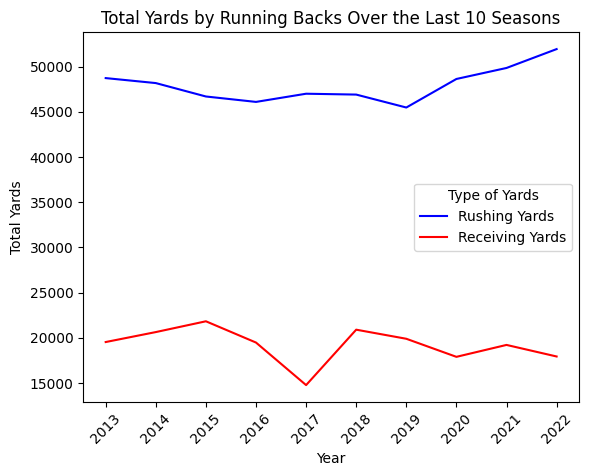

In [21]:
#Plot receiving and rushing yards by running backs over the last 10 seasons
plt.plot(x, y, "blue", linestyle ='solid',label="Rushing Yards")
plt.plot(x1, y1, "red", linestyle ='solid',label="Receiving Yards")
plt.xlabel('Year')
plt.ylabel('Total Yards')
plt.title('Total Yards by Running Backs Over the Last 10 Seasons')
plt.legend(title="Type of Yards")
plt.xticks(rotation = 45)

plt.show()

**The following code produces the superposition of the graph above**

In [22]:
total_yds_per_year_rb = []
total_yds_per_year_rb = master_df.year
total_yds_per_year_rb = dict.fromkeys(total_rec_yds_per_year_rb)
for i in total_yds_per_year_rb.keys():
    total_yds_per_year_rb[i] = 0
for i in total_yds_per_year_rb.keys():
    for ind in master_df.index:
        if (i == master_df['year'][ind]) and (master_df['Pos'][ind] == 'RB'):
            total_yds_per_year_rb[i] += master_df['Yds_receiving'][ind]
        if (i == master_df['year'][ind]) and (master_df['Pos'][ind] == 'RB'):
            total_yds_per_year_rb[i] += master_df['Yds_rush'][ind]

In [23]:
total_yds_per_year_rb

{'2013': 68268.0,
 '2014': 68818.0,
 '2015': 68529.0,
 '2016': 65579.0,
 '2017': 61782.0,
 '2018': 67812.0,
 '2019': 65377.0,
 '2020': 66535.0,
 '2021': 69068.0,
 '2022': 69876.0}

In [24]:
x2 = list(total_yds_per_year_rb.keys())
y2 = list(total_yds_per_year_rb.values())

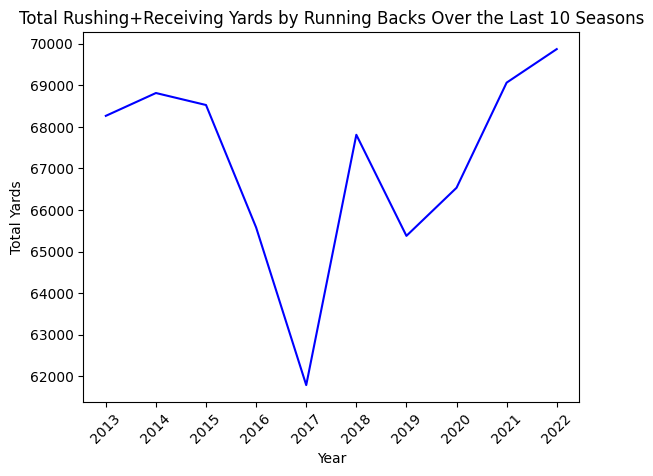

In [25]:
plt.plot(x2, y2, "blue", linestyle ='solid')
plt.xlabel('Year')
plt.ylabel('Total Yards')
plt.title('Total Rushing+Receiving Yards by Running Backs Over the Last 10 Seasons')
plt.xticks(rotation = 45)

plt.show()

In [26]:
#Create a dataframe from the master dataframe that just contains running back data
rb_df = master_df[master_df['Pos'] == 'RB']

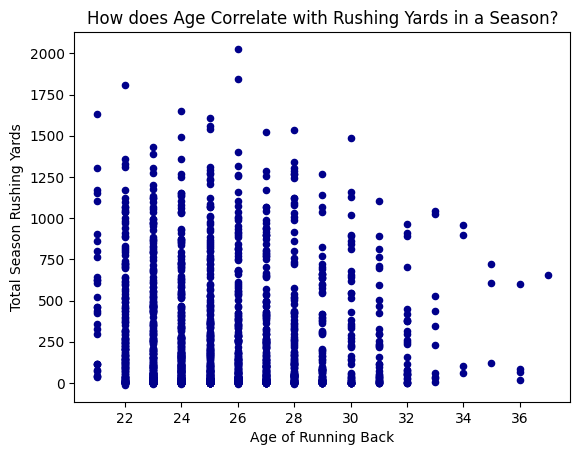

In [27]:
#Create a scatter plot that compares age to rushing yards in a season
ax1 = rb_df.plot.scatter(x='Age', y='Yds_rush', xlabel = 'Age of Running Back', 
                         ylabel='Total Season Rushing Yards', 
                         title = 'How does Age Correlate with Rushing Yards in a Season?',
                         c='DarkBlue')

**The following code looks more closely at team level data**

In [28]:
#Go back to main directory to read in salary data
os.chdir('..')

In [29]:
#Read in the salary data
salary_df = pd.read_excel('NFL_Salary_Info.xlsx')

In [30]:
#Display the first five rows
salary_df.head(5)

Team        QB        RB        WR        TE        OL   Offense  \
0    49ers   2897535   9182062  16963177  10569598  17581156  57193528   
1    Bears  11276471  12036166  16580067   2495000  10071052  52458756   
2  Bengals   2881583   5750703   8730272   5005166  22390147  44757871   
3    Bills   4663940   8362867   8979223   4489668  14455361  40951059   
4  Broncos  18716295   5070632  10120554   8013902  25550424  67471807   

        IDL      EDGE        LB         S        CB   Defense  Year  
0  11028483  10194288   7666512  10696955  13185741  52771979  2013  
1  10999363  18744765  12510915   3802254  15375000  61432297  2013  
2  13979869  24778885   8370673   5834061  16118302  69081790  2013  
3  16611040  13270000   5414838  10503423   7069748  52869049  2013  
4   6880138  10234767   8030669   5894346  17559225  48599145  2013

In [31]:
#Add the salary cap to each row, depending on the year
salary_df = pd.merge(salary_df,salary_data, on = 'Year', how = 'left')

In [32]:
#Show the dataframe
salary_df

Team        QB        RB        WR        TE        OL   Offense  \
0      49ers   2897535   9182062  16963177  10569598  17581156  57193528   
1      Bears  11276471  12036166  16580067   2495000  10071052  52458756   
2    Bengals   2881583   5750703   8730272   5005166  22390147  44757871   
3      Bills   4663940   8362867   8979223   4489668  14455361  40951059   
4    Broncos  18716295   5070632  10120554   8013902  25550424  67471807   
..       ...       ...       ...       ...       ...       ...       ...   
315  Broncos  18082500   6405499  19436070   5262023  43074703  92260795   
316    Bills  20230481   7299886  18982654   4501683  29350967  80365671   
317  Bengals  11332371  15533810  22298088   7324969  30652020  87141258   
318    Bears   6917413   4900984  11115639   5756091  27473483  56163610   
319    49ers  22715235   3134553  15039393  10376509  29524154  80789844   

          IDL      EDGE        LB         S        CB    Defense  Year  \
0    11028483  10194288   7666512  10696955  13185741   52771979  2013   
1    10999363  18744765  12510915   3802254  15375000   61432297  2013   
2    13979869  24778885   8370673   5834061  16118302   69081790  2013   
3    16611040  13270000   5414838  10503423   7069748   52869049  2013   
4     6880138  10234767   8030669   5894346  17559225   48599145  2013   
..        ...       ...       ...       ...       ...        ...   ...   
315  13772100  10635344   6989055  23249297  22834821   77480617  2022   
316  16458562  12078022  24091768  18151730  26310989   97091071  2022   
317  25457899  24666921   7997820  26928297  20293823  105344760  2022   
318  11799311   5649095   6862834  20336001   5518865   50166106  2022   
319  18535038  25268938  16541317  17549904  14537091   92432288  2022   

     salary_cap  
0     123600000  
1     123600000  
2     123600000  
3     123600000  
4     123600000  
..          ...  
315   208200000  
316   208200000  
317   208200000  
318   208200000  
319   208200000  

[320 rows x 15 columns]

In [33]:
#Calculate team's total spending
salary_df['Total_Spending'] = salary_df['Offense'] + salary_df['Defense']

In [34]:
#See which team spent the most on running backs over the last 10 seasons
salary_df = salary_df.sort_values(by = 'RB', ascending=False)

In [35]:
#Show the result
salary_df.head(1)

Team        QB        RB        WR        TE        OL    Offense  \
307  Cowboys  21325834  20945082  13438525  13499164  41380342  110588947   

         IDL      EDGE        LB        S        CB   Defense  Year  \
307  8309513  19438110  11775184  9347479  18798262  67668548  2022   

     salary_cap  Total_Spending  
307   208200000       178257495

In [36]:
#Change directory to read in team record data
os.chdir('./Team Record Files')

In [37]:
#Create the list of teams
teams = ['49ers','Cardinals','Falcons','Ravens','Bills','Panthers','Bears','Bengals','Browns','Cowboys',
'Broncos','Lions','Packers','Texans','Colts','Jaguars','Chiefs','Raiders','Chargers','Rams','Dolphins','Vikings',
'Patriots','Saints','Giants','Jets','Eagles','Steelers','Seahawks','Buccaneers','Titans','Commanders']

#create the empty dataframe
new_df=pd.DataFrame(columns=('Year','Tm','W','L','T','Div. Finish','Playoffs','PF','PA','PD','Pts','Yds'))

#read in and concatenate the data
for i in teams:
    team = pd.read_excel((i+'.xlsx'),header = [0],skiprows=1,usecols=('Year','Tm','W','L','T','Div. Finish','Playoffs','PF','PA','PD','Pts','Yds'))
    dat_df1=pd.DataFrame(team) 
    new_df=pd.concat([new_df, dat_df1])
    
#reset the indices
new_df = new_df[new_df['Year']>=2013].reset_index()

In [38]:
#show the new dataframe 
new_df.head(5)

index  Year                    Tm   W   L  T Div. Finish   Playoffs   PF  \
0      0  2022  San Francisco 49ers*  13   4  0    1st of 4  Lost Conf  450   
1      1  2021  San Francisco 49ers*  10   7  0    3rd of 4  Lost Conf  427   
2      2  2020   San Francisco 49ers   6  10  0    4th of 4        NaN  376   
3      3  2019  San Francisco 49ers*  13   3  0    1st of 4    Lost SB  479   
4      4  2018   San Francisco 49ers   4  12  0    3rd of 4        NaN  342   

    PA   PD Pts Yds  
0  277  173   6   5  
1  365   62  13   7  
2  390  -14  21  15  
3  310  169   2   4  
4  435  -93  21  16

**The following code renames each team in new_df to just the team name (ex: "San Francisco 49ers" to just "49ers") to allow for an easy merge later**

In [39]:
new_df.loc[0:9,'Tm']='49ers'
new_df

index  Year                    Tm   W   L  T Div. Finish   Playoffs   PF  \
0        0  2022                 49ers  13   4  0    1st of 4  Lost Conf  450   
1        1  2021                 49ers  10   7  0    3rd of 4  Lost Conf  427   
2        2  2020                 49ers   6  10  0    4th of 4        NaN  376   
3        3  2019                 49ers  13   3  0    1st of 4    Lost SB  479   
4        4  2018                 49ers   4  12  0    3rd of 4        NaN  342   
..     ...   ...                   ...  ..  .. ..         ...        ...  ...   
315      5  2017   Washington Redskins   7   9  0    3rd of 4        NaN  342   
316      6  2016   Washington Redskins   8   7  1    3rd of 4        NaN  396   
317      7  2015  Washington Redskins*   9   7  0    1st of 4    Lost WC  388   
318      8  2014   Washington Redskins   4  12  0    4th of 4        NaN  301   
319      9  2013   Washington Redskins   3  13  0    4th of 4        NaN  334   

      PA    PD Pts Yds  
0    277   173   6   5  
1    365    62  13   7  
2    390   -14  21  15  
3    310   169   2   4  
4    435   -93  21  16  
..   ...   ...  ..  ..  
315  388   -46  16  16  
316  383    13  12   3  
317  379     9  10  17  
318  438  -137  26  13  
319  478  -144  23   9  

[320 rows x 13 columns]

In [40]:
new_df.loc[10:19,'Tm']='Cardinals'
new_df[new_df['Tm']=='Cardinals']

index  Year         Tm   W   L  T Div. Finish   Playoffs   PF   PA    PD  \
10      0  2022  Cardinals   4  13  0    4th of 4        NaN  340  449  -109   
11      1  2021  Cardinals  11   6  0    2nd of 4    Lost WC  449  366    83   
12      2  2020  Cardinals   8   8  0    3rd of 4        NaN  410  367    43   
13      3  2019  Cardinals   5  10  1    4th of 4        NaN  361  442   -81   
14      4  2018  Cardinals   3  13  0    4th of 4        NaN  225  425  -200   
15      5  2017  Cardinals   8   8  0    3rd of 4        NaN  295  361   -66   
16      6  2016  Cardinals   7   8  1    2nd of 4        NaN  418  362    56   
17      7  2015  Cardinals  13   3  0    1st of 4  Lost Conf  489  313   176   
18      8  2014  Cardinals  11   5  0    2nd of 4    Lost WC  310  299    11   
19      9  2013  Cardinals  10   6  0    3rd of 4        NaN  379  324    55   

   Pts Yds  
10  21  22  
11  11   8  
12  13   6  
13  16  21  
14  32  32  
15  25  22  
16   6   9  
17   2   1  
18  24  24  
19  16  12

In [41]:
first = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310]
second = [9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,199,209,219,229,239,249,259,269,279,289,299,309,319]
numlist=[]
for i in range(len(first)):
    numlist.append((first[i],second[i]))
numlist
for i in range(len(numlist)):
    new_df.loc[numlist[i][0]:numlist[i][1],'Tm']=teams[i]
new_df.head()

index  Year     Tm   W   L  T Div. Finish   Playoffs   PF   PA   PD Pts Yds
0      0  2022  49ers  13   4  0    1st of 4  Lost Conf  450  277  173   6   5
1      1  2021  49ers  10   7  0    3rd of 4  Lost Conf  427  365   62  13   7
2      2  2020  49ers   6  10  0    4th of 4        NaN  376  390  -14  21  15
3      3  2019  49ers  13   3  0    1st of 4    Lost SB  479  310  169   2   4
4      4  2018  49ers   4  12  0    3rd of 4        NaN  342  435  -93  21  16

In [42]:
#Creates a line chart for each team to show wins over time
alt.Chart(new_df).mark_line().encode(
    x = 'Year:T', y = 'W:Q', #scale=alt.Scale(zero=False)),
    color="Tm"
).properties(
    width=500,
    height=300,
    title="Wins by Team 2013-2022")
#fuzzy matching

alt.Chart(...)

In [43]:
#Creates a line chart for each team to show points over time
alt.Chart(new_df).mark_line().encode(
    x = 'Year:T', y = alt.Y('PF:Q', scale=alt.Scale(zero=False)),
    color="Tm"
).properties(
    width=500,
    height=300,
    title="Points For by Team 2013-2022")

alt.Chart(...)

Those charts showed nothing interesting and are absolute chaos, so we tried something else

In [44]:
#Rename 'Tm' column to 'Team'
new_df.rename(columns = {'Tm':'Team'}, inplace = True)

In [45]:
#Merge team and salary data using team and year combinations
salary_df = pd.merge(salary_df,new_df, on = ['Team','Year'], how = 'left')
salary_df

Team        QB        RB        WR        TE        OL    Offense  \
0     Cowboys  21325834  20945082  13438525  13499164  41380342  110588947   
1     Vikings   5245038  16960950  15700531   8705993  29660487   76272999   
2      Eagles   3772237  16415834  10693053   5720045  29339566   65940735   
3      Texans  14334715  16353897  23107507   6027564  37592815   97416498   
4     Vikings   8470554  15752460  10378281   4582245  20329032   59512572   
..        ...       ...       ...       ...       ...       ...        ...   
315  Steelers  27991392   1766913   4570576   8105668  36091768   78526317   
316  Steelers  21333138   1669039   7942649   7847766  14731514   53524106   
317   Packers  22071928   1581868  26709607  10835666  33058976   94258045   
318  Steelers  24607847   1545560  13094252   5891394  35090781   80229834   
319    Browns   2807980   1529301  10771737   4683350  30648671   50441039   

          IDL      EDGE        LB  ...   W   L  T Div. Finish  Playoffs   PF  \
0     8309513  19438110  11775184  ...  12   5  0    2nd of 4  Lost Div  467   
1    10108617  15465984  11870684  ...  11   5  0    1st of 4   Lost WC  365   
2     6088275  17791018  10285319  ...  10   6  0    2nd of 4       NaN  474   
3    23019923  16478521  17873795  ...   4  12  0    3rd of 4       NaN  384   
4    11556066  24552100  13577945  ...   5  10  1    4th of 4       NaN  391   
..        ...       ...       ...  ...  ..  .. ..         ...       ...  ...   
315  31563825  14409336  13056501  ...   8   8  0    2nd of 4       NaN  289   
316   9360367  13428435  15222160  ...  11   5  0    1st of 4   Lost WC  436   
317  19391088  23692894   4603006  ...   6   9  1    3rd of 4       NaN  376   
318  18570996   7627086  15162163  ...   9   6  1    2nd of 4       NaN  428   
319  17269848  13935899   7257125  ...   7   9  0    4th of 4       NaN  299   

      PA   PD Pts Yds  
0    342  125   4  11  
1    302   63  16  29  
2    400   74   3   5  
3    464  -80  18  13  
4    480  -89  14  13  
..   ...  ...  ..  ..  
315  303  -14  27  30  
316  368   68   7   2  
317  400  -24  14  12  
318  360   68   6   4  
319  337  -38  27  23  

[320 rows x 27 columns]

In [46]:
#Create a column for wins to running back salary ratio
salary_df['Wins/RB_Spending'] = salary_df['W']/salary_df['RB']

In [47]:
#For NA values in the Playoff column, actually put text that represents the same thing --> the team did not make the playoffs that year
salary_df.Playoffs = salary_df.Playoffs.fillna('Did Not Make Playoffs')

In [48]:
#Fully spell out season results so the bar graoh created later actually looks good
salary_df = salary_df.replace('Lost Div','Lost Divisional Round')
salary_df = salary_df.replace('Lost WC','Lost Wild Card Round')
salary_df = salary_df.replace('Lost Conf','Lost Conference Round')
salary_df = salary_df.replace('Lost SB','Lost Super Bowl')
salary_df = salary_df.replace('Won SB','Won Super Bowl')

In [49]:
#Display the dataframe
salary_df.head(5)

Team        QB        RB        WR        TE        OL    Offense  \
0  Cowboys  21325834  20945082  13438525  13499164  41380342  110588947   
1  Vikings   5245038  16960950  15700531   8705993  29660487   76272999   
2   Eagles   3772237  16415834  10693053   5720045  29339566   65940735   
3   Texans  14334715  16353897  23107507   6027564  37592815   97416498   
4  Vikings   8470554  15752460  10378281   4582245  20329032   59512572   

        IDL      EDGE        LB  ...   L  T  Div. Finish  \
0   8309513  19438110  11775184  ...   5  0     2nd of 4   
1  10108617  15465984  11870684  ...   5  0     1st of 4   
2   6088275  17791018  10285319  ...   6  0     2nd of 4   
3  23019923  16478521  17873795  ...  12  0     3rd of 4   
4  11556066  24552100  13577945  ...  10  1     4th of 4   

                Playoffs   PF   PA   PD Pts Yds Wins/RB_Spending  
0  Lost Divisional Round  467  342  125   4  11         0.000001  
1   Lost Wild Card Round  365  302   63  16  29         0.000001  
2  Did Not Make Playoffs  474  400   74   3   5         0.000001  
3  Did Not Make Playoffs  384  464  -80  18  13              0.0  
4  Did Not Make Playoffs  391  480  -89  14  13              0.0  

[5 rows x 28 columns]

Text(0, 0.5, 'Average Spent on Running Backs (million USD)')

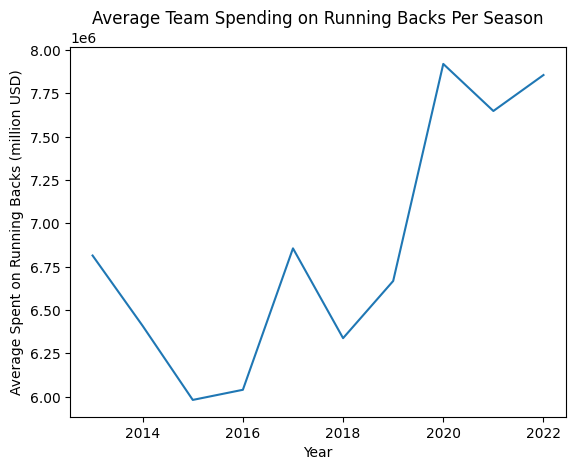

In [50]:
#Create the graph for average spending per running backs per year
pay = salary_df.groupby('Year')['RB'].mean()
pay.plot(kind='line')
plt.xticks(rotation=0)
plt.title('Average Team Spending on Running Backs Per Season')
plt.xlabel('Year')
plt.ylabel('Average Spent on Running Backs (million USD)')

In [51]:
#Change back to the main directory
os.chdir('..')

In [52]:
#Create an excel file from the salary dataframe that can be then inputted into R for regression analysis
salary_df.to_excel("Master_Data.xlsx")

In [53]:
#Sort the values by year
salary_df = salary_df.sort_values(by=['Year'],ascending=True)

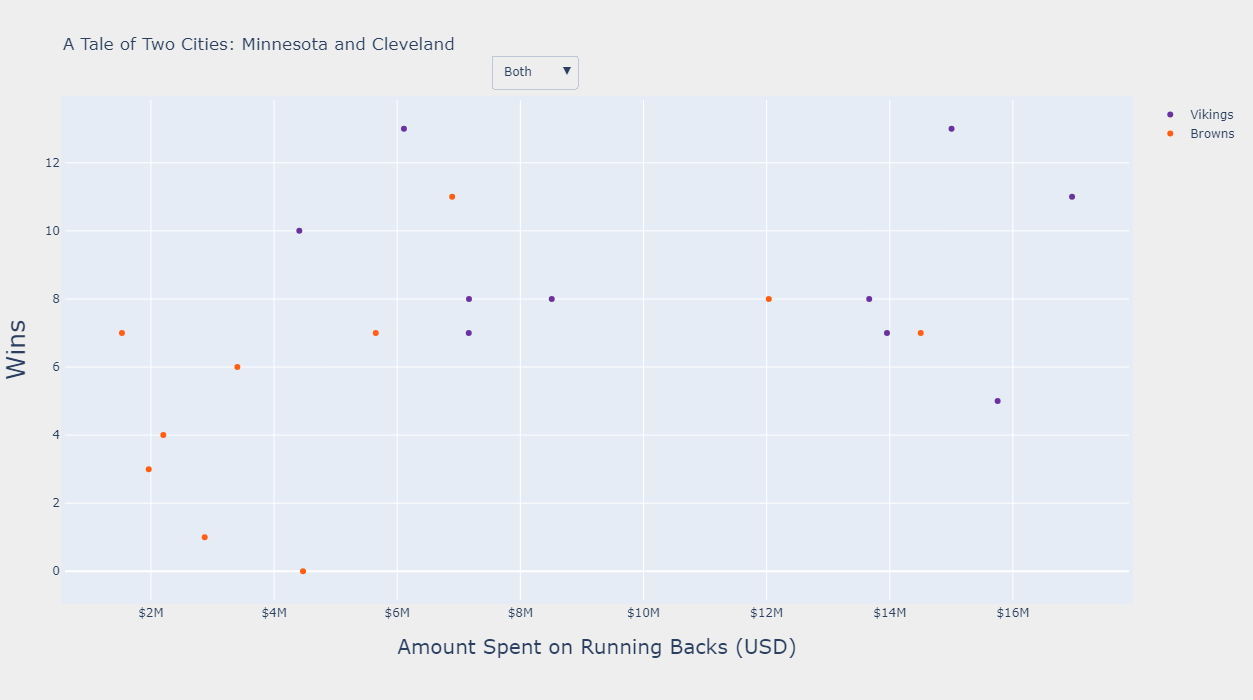

In [54]:
#Creating a graph plotting wins against running back salary for the Minnesota Vikings and Cleveland Browns
fig = go.Figure()

#Adding each teams data
fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Team'] == "Vikings"].RB),
               y=list(salary_df.loc[salary_df['Team'] == "Vikings"].W),
               mode='markers',
               marker_color='#6a329f',
               name="Vikings"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Team'] == "Browns"].RB),
               y=list(salary_df.loc[salary_df['Team'] == "Browns"].W),
               mode='markers',
               marker_color='#FF5F13',
               name="Browns",
               )
)


#creating a dropdown menu to display either team (or both)
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "Minnesota Vikings and Cleveland Browns",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="Browns",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Browns",
                            #"annotations": high_annotations
                           }]),
                dict(label="Vikings",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Vikings",
                            #"annotations": low_annotations
                           }]),
            ]),
             x=0.4,
            xanchor="left",
            y=1.09,
            yanchor="top"
        )
    ])

# Set main title and axes labels, as well as chart sizing
fig.update_layout(title_text="A Tale of Two Cities: Minnesota and Cleveland")
fig.update_xaxes(
        tickangle = 0,
        title_text = "Amount Spent on Running Backs (USD)",
        title_font = {"size": 20},
        title_standoff = 25,
        tickprefix="$")

fig.update_yaxes(
        tickangle = 0,
        title_text = "Wins",
        title_font = {"size": 25},
        title_standoff = 15)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#eeeeee",
)


#Display the chart
fig.show()

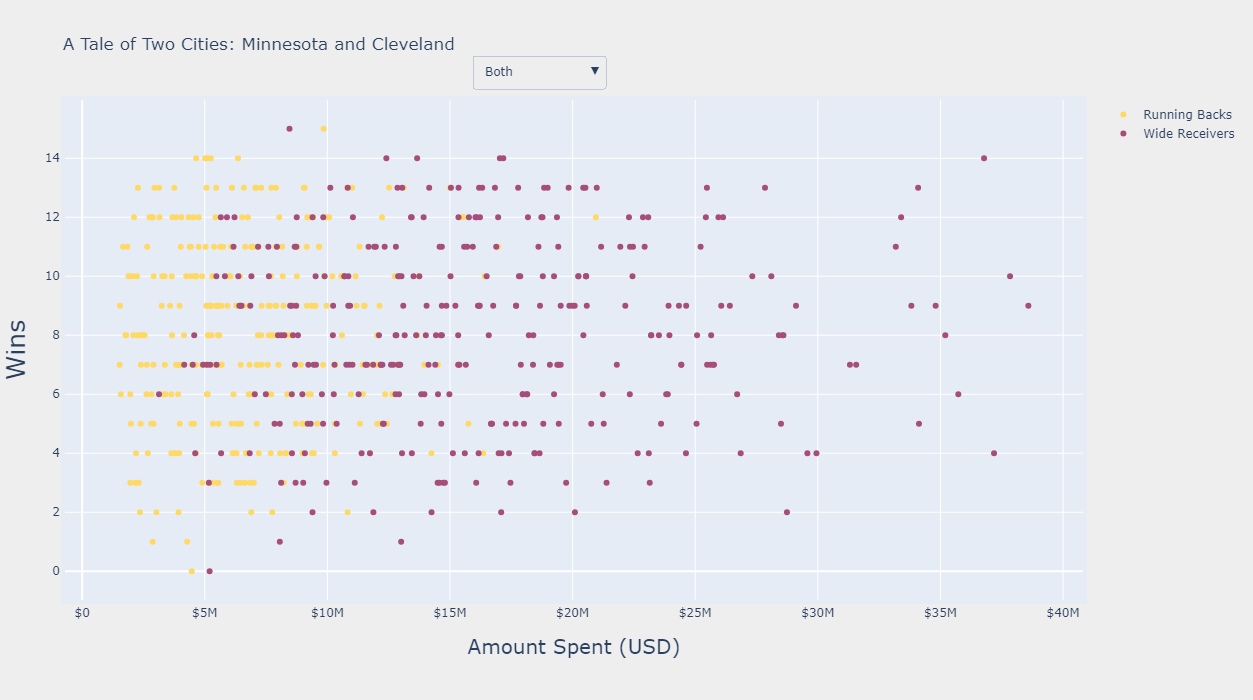

In [55]:
#Following a similar process as above, but this time for just the wide receivers and running backs on the Minnesota Vikings
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(salary_df.RB),
               y=list(salary_df.W),
               mode='markers',
               marker_color='#ffd966',
               name="Running Backs"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.WR),
               y=list(salary_df.W),
               mode='markers',
               marker_color='#a64d79',
               name="Wide Receivers",
               )
)


fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "Running Backs and Wide Receivers",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="Wide Receivers",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Wide Receivers",
                            #"annotations": high_annotations
                           }]),
                dict(label="Running Backs",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Running Backs",
                            #"annotations": low_annotations
                           }]),
            ]),
             x=0.4,
            xanchor="left",
            y=1.09,
            yanchor="top"
        )
    ])

# Set main title and axes labels
fig.update_layout(title_text="A Tale of Two Cities: Minnesota and Cleveland")
fig.update_xaxes(
        tickangle = 0,
        title_text = "Amount Spent (USD)",
        title_font = {"size": 20},
        title_standoff = 25,
        tickprefix="$")

fig.update_yaxes(
        tickangle = 0,
        title_text = "Wins",
        title_font = {"size": 25},
        title_standoff = 15)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#eeeeee",
)


fig.show()


In [56]:
#Creating RB Ratio column
salary_df['RB_Offense'] = salary_df['RB'] / salary_df['Offense']

In [57]:
#Creating RB Skill ration column
salary_df['RB_Skill'] = salary_df['RB'] / (salary_df['RB']+salary_df['WR']+salary_df['TE'])

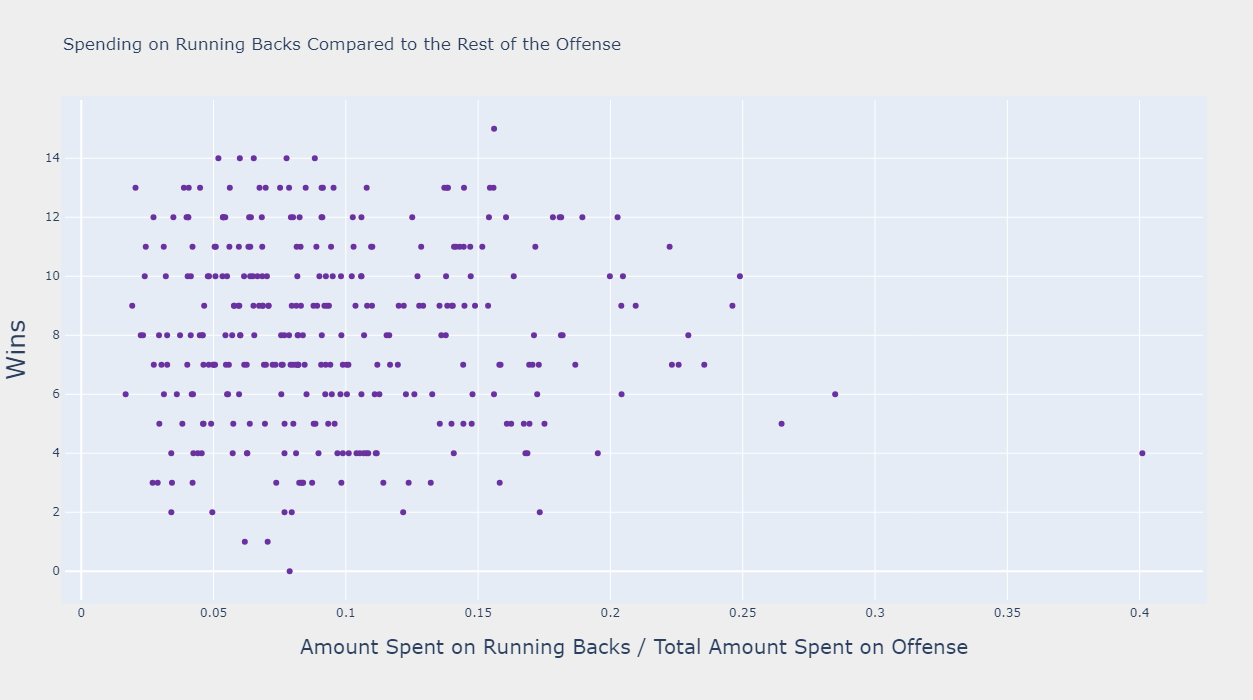

In [58]:
#Looking at the wins and running back ratios for all teams over the last 10 seasons (with no distinction in team)
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(salary_df.RB_Offense),
               y=list(salary_df.W),
               mode='markers',
               marker_color='#6a329f',
               name="Vikings"
              )
)

# Set main title and axes labels
fig.update_layout(title_text="Spending on Running Backs Compared to the Rest of the Offense")

fig.update_xaxes(
        tickangle = 0,
        title_text = "Amount Spent on Running Backs / Total Amount Spent on Offense",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        tickangle = 0,
        title_text = "Wins",
        title_font = {"size": 25},
        title_standoff = 15)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#eeeeee",
)


fig.show()


In [59]:
salary_df = salary_df.astype({'Year':'string'})

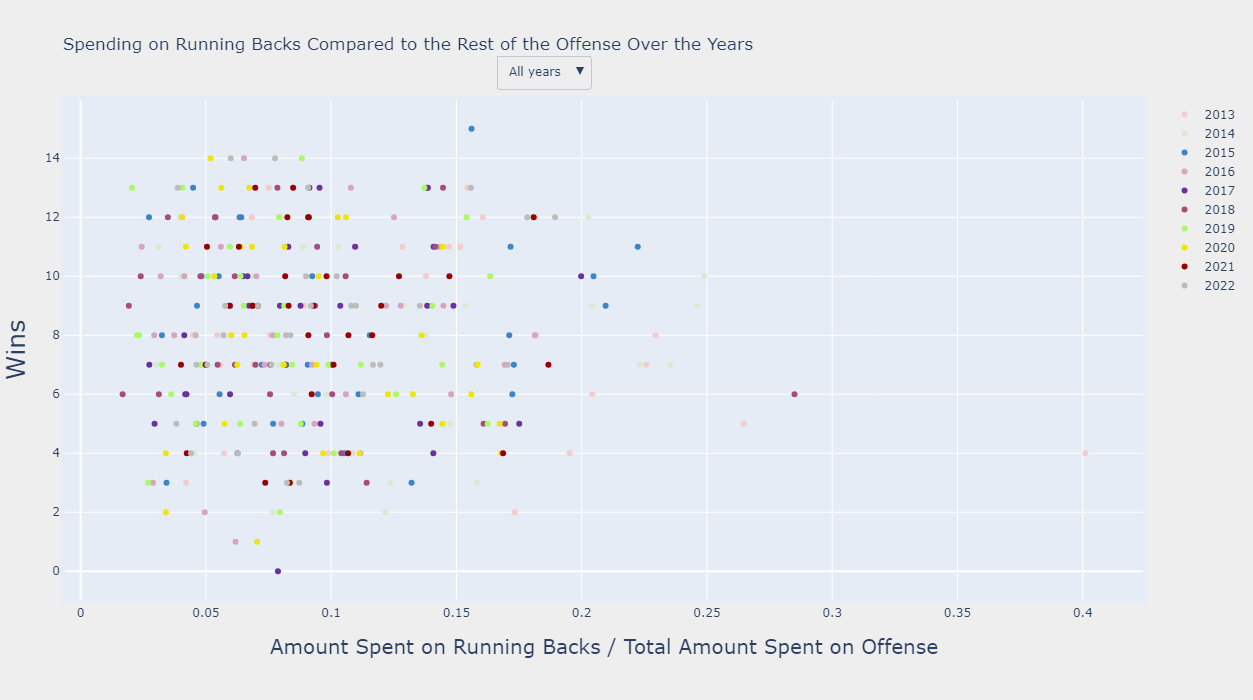

In [60]:
#Creating a graph with a dropdown menu (the options are the years) plotting wins against RB Ratio
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2013'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2013'].W),
               mode='markers',
               marker_color='#f4cccc',
               name="2013"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2014'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2014'].W),
               mode='markers',
               marker_color='#d9ead3',
               name="2014",
               )
)
    
fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2015'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2015'].W),
               mode='markers',
               marker_color='#3d85c6',
               name="2015"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2016'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2016'].W),
               mode='markers',
               marker_color='#d5a6bd',
               name="2016",
               )
)
    
fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2017'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2017'].W),
               mode='markers',
               marker_color='#6a329f',
               name="2017"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2018'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2018'].W),
               mode='markers',
               marker_color='#a64d79',
               name="2018",
               )
)
    
fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2019'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2019'].W),
               mode='markers',
               marker_color='#aaf966',
               name="2019"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2020'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2020'].W),
               mode='markers',
               marker_color='#eee50b',
               name="2020",
               )
)
    
fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2021'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2021'].W),
               mode='markers',
               marker_color='#990000',
               name="2021"
              )
)

fig.add_trace(
    go.Scatter(x=list(salary_df.loc[salary_df['Year'] == '2022'].RB_Offense),
               y=list(salary_df.loc[salary_df['Year'] == '2022'].W),
               mode='markers',
               marker_color='#bcbcbc',
               name="2022",
               #labels=dict(total_bill="Total Bill ($)", tip="Tip ($)", sex="Payer Gender")
               )
)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All years",
                     method="update",
                     args=[{"visible": [True, True, True,True, True, True,True, True, True,True]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2013",
                     method="update",
                     args=[{"visible": [True, False, False,False, False, False,False, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2014",
                     method="update",
                     args=[{"visible": [False, True, False,False, False, False,False, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2015",
                     method="update",
                     args=[{"visible": [False, False, True,False, False, False,False, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2016",
                     method="update",
                     args=[{"visible": [False, False, False,True, False, False,False, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2017",
                     method="update",
                     args=[{"visible": [False, False, False,False, True, False,False, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2018",
                     method="update",
                     args=[{"visible": [False, False, False,False, False, True,False, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2019",
                     method="update",
                     args=[{"visible": [False, False, False,False, False, False,True, False, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2020",
                     method="update",
                     args=[{"visible": [False, False, False,False, False, False,False, True, False,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2021",
                     method="update",
                     args=[{"visible": [False, False, False,False, False, False,False, False, True,False]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
                dict(label="2022",
                     method="update",
                     args=[{"visible": [False, False, False,False, False, False,False, False, False,True]},
                           {"title": "Spending on Running Backs Compared to the Rest of the Offense Over the Years",
                          # "annotations": high_annotations + low_annotations
                           }]),
            ]),
             x=0.4,
            xanchor="left",
            y=1.09,
            yanchor="top"
        )
    ]
)

# Set main title and axes labels
fig.update_layout(title_text="Spending on Running Backs Compared to the Rest of the Offense Over the Years")

fig.update_xaxes(
        tickangle = 0,
        title_text = "Amount Spent on Running Backs / Total Amount Spent on Offense",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        tickangle = 0,
        title_text = "Wins",
        title_font = {"size": 25},
        title_standoff = 15)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#eeeeee",
)

fig.show()

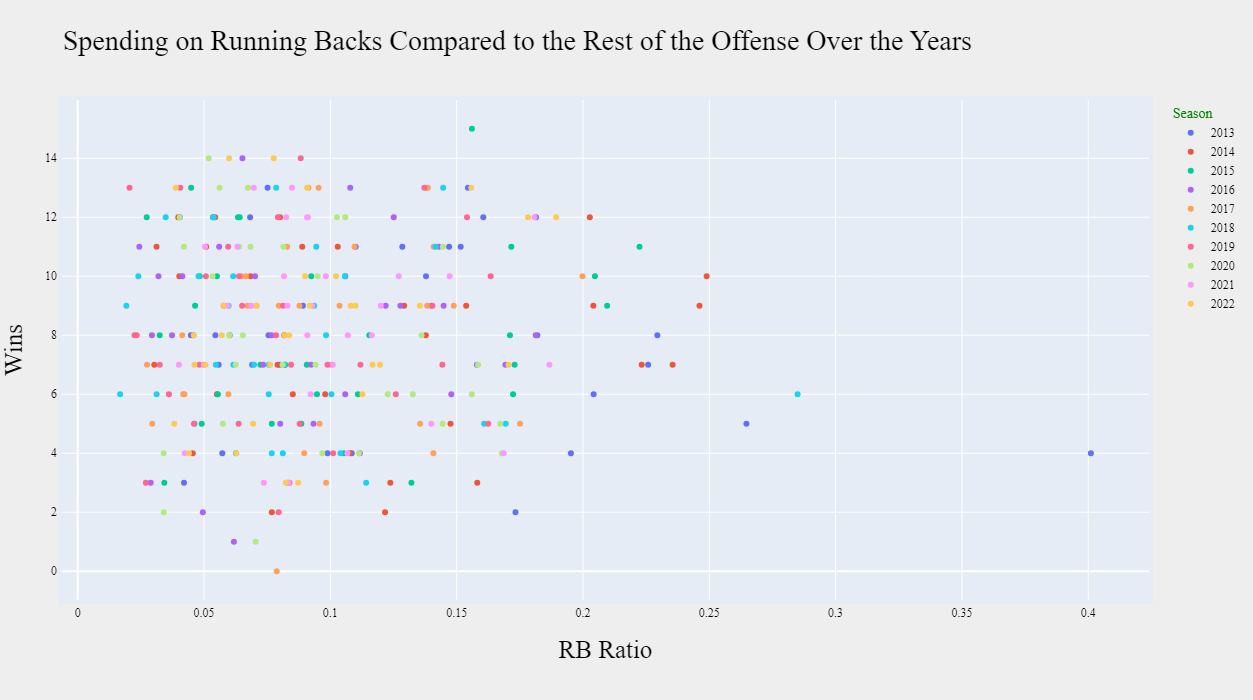

In [61]:
#Similar graph as above, except using plotly express instead of graph features
fig = px.scatter(salary_df, x="RB_Offense", y="W", color="Year",
                 labels=dict(RB_Offense="RB Ratio", W="Wins", Year="Season")
                )
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="green"
)

fig.update_layout(
    title=dict(text="Spending on Running Backs Compared to the Rest of the Offense Over the Years", font=dict(size=28), automargin=False, yref='paper')
)

fig.update_xaxes(
        tickangle = 0,
        title_text = "RB Ratio",
        title_font = {"size": 25},
        title_standoff = 25)

fig.update_yaxes(
        tickangle = 0,
        title_text = "Wins",
        title_font = {"size": 25},
        title_standoff = 15)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#eeeeee",
)

fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

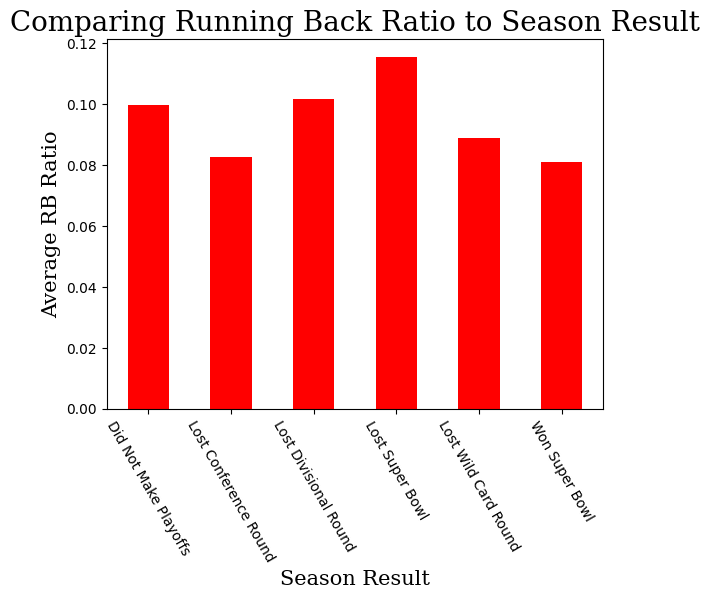

In [62]:
#Create a bar chart showing average RB ratio per season result 
po = salary_df.groupby('Playoffs')['RB_Offense'].mean()
po.plot(kind='bar',color='red')
plt.xticks(rotation=300)

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}

plt.title("Comparing Running Back Ratio to Season Result", fontdict = font1, loc = 'center')
plt.xlabel("Season Result", fontdict = font2)
plt.ylabel("Average RB Ratio", fontdict = font2)

#plt.yticks(fontsize=20,fontdict = font2)

plt.show

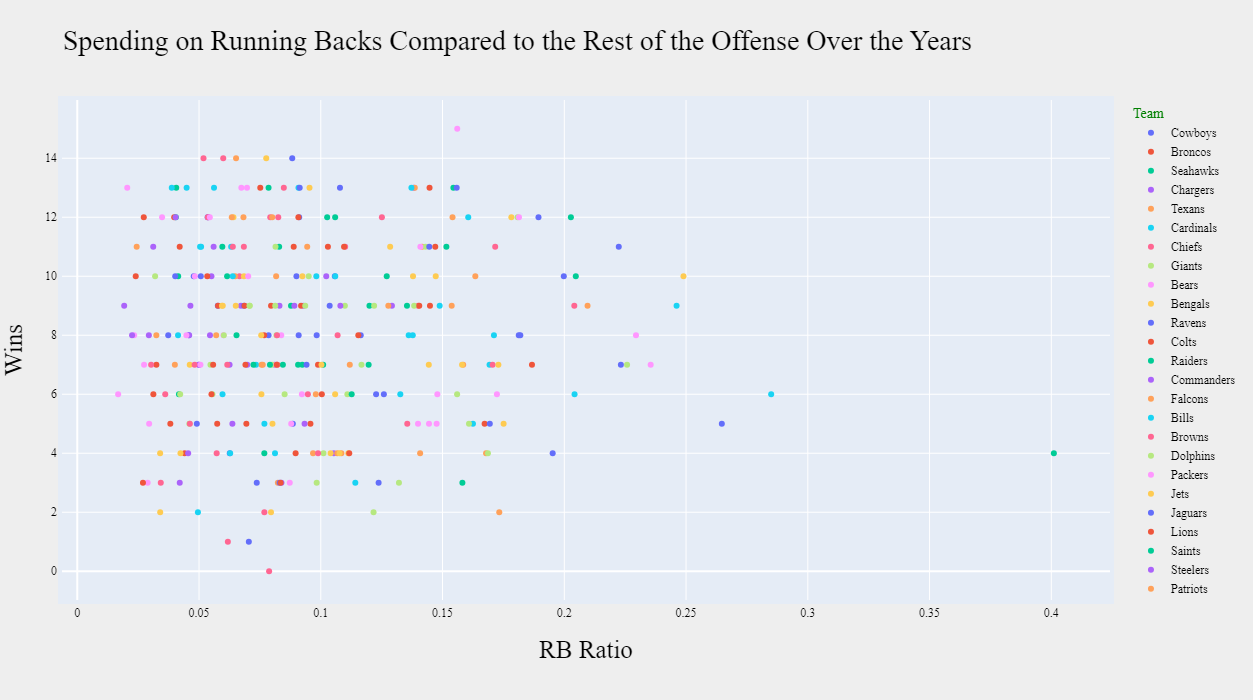

In [63]:
#Create a scatter plot for Wins vs RB Ratio, which each color representing a different team
fig = px.scatter(salary_df, x="RB_Offense", y="W", color="Team",
                 labels=dict(RB_Offense="RB Ratio", W="Wins", Team="Team")
                )
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="green"
)

fig.update_layout(
    title=dict(text="Spending on Running Backs Compared to the Rest of the Offense Over the Years", font=dict(size=28), automargin=False, yref='paper')
)

fig.update_xaxes(
        tickangle = 0,
        title_text = "RB Ratio",
        title_font = {"size": 25},
        title_standoff = 25)

fig.update_yaxes(
        tickangle = 0,
        title_text = "Wins",
        title_font = {"size": 25},
        title_standoff = 15)

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#eeeeee",
)

fig.show()